<a href="https://colab.research.google.com/github/Hariprakashhp/singapore-flat-price-prediction/blob/main/singapore_flat_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
files = ['1990to1999.csv', '2000to2012.csv','2015to2016.csv','2017.csv']
df = pd.concat(map(pd.read_csv, files), ignore_index=True)
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977.0,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977.0,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977.0,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977.0,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976.0,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
360681,2018-01,WOODLANDS,4 ROOM,160,WOODLANDS ST 13,04 TO 06,103.0,Model A,1990.0,356000.0,71 years 04 months
360682,2018-01,WOODLANDS,4 ROOM,708,WOODLANDS DR 70,10 TO 12,99.0,Model A,1996.0,362888.0,77 years 11 months
360683,2018-01,WOODLANDS,4 ROOM,668,WOODLANDS RING RD,10 TO 12,91.0,Model A,2000.0,365000.0,81 years 09 months
360684,2018-01,WOODLANDS,4 ROOM,686B,WOODLANDS DR 73,07 TO 09,94.0,Premium Apartment,2003.0,366000.0,84 years 01 month


In [60]:
df.dropna(inplace=True)
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
313844,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986.0,255000.0,70
313845,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981.0,275000.0,65
313846,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980.0,285000.0,64
313847,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979.0,290000.0,63
313848,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980.0,290000.0,64
...,...,...,...,...,...,...,...,...,...,...,...
360680,2018-01,WOODLANDS,4 ROOM,556,WOODLANDS DR 53,07 TO 09,100.0,Model A,1999.0,350000.0,80 years 11 months
360681,2018-01,WOODLANDS,4 ROOM,160,WOODLANDS ST 13,04 TO 06,103.0,Model A,1990.0,356000.0,71 years 04 months
360682,2018-01,WOODLANDS,4 ROOM,708,WOODLANDS DR 70,10 TO 12,99.0,Model A,1996.0,362888.0,77 years 11 months
360683,2018-01,WOODLANDS,4 ROOM,668,WOODLANDS RING RD,10 TO 12,91.0,Model A,2000.0,365000.0,81 years 09 months


In [61]:
df.drop_duplicates(inplace=True)

In [62]:
df.info

<bound method DataFrame.info of           month        town flat_type block        street_name storey_range  \
313844  2015-01  ANG MO KIO    3 ROOM   174   ANG MO KIO AVE 4     07 TO 09   
313845  2015-01  ANG MO KIO    3 ROOM   541  ANG MO KIO AVE 10     01 TO 03   
313846  2015-01  ANG MO KIO    3 ROOM   163   ANG MO KIO AVE 4     01 TO 03   
313847  2015-01  ANG MO KIO    3 ROOM   446  ANG MO KIO AVE 10     01 TO 03   
313848  2015-01  ANG MO KIO    3 ROOM   557  ANG MO KIO AVE 10     07 TO 09   
...         ...         ...       ...   ...                ...          ...   
360680  2018-01   WOODLANDS    4 ROOM   556    WOODLANDS DR 53     07 TO 09   
360681  2018-01   WOODLANDS    4 ROOM   160    WOODLANDS ST 13     04 TO 06   
360682  2018-01   WOODLANDS    4 ROOM   708    WOODLANDS DR 70     10 TO 12   
360683  2018-01   WOODLANDS    4 ROOM   668  WOODLANDS RING RD     10 TO 12   
360684  2018-01   WOODLANDS    4 ROOM  686B    WOODLANDS DR 73     07 TO 09   

        floor_area_sqm         flat_model  lease_commence_date  resale_price  \
313844            60.0           Improved               1986.0      255000.0   
313845            68.0     New Generation               1981.0      275000.0   
313846            69.0     New Generation               1980.0      285000.0   
313847            68.0     New Generation               1979.0      290000.0   
313848            68.0     New Generation               1980.0      290000.0   
...                ...                ...                  ...           ...   
360680           100.0            Model A               1999.0      350000.0   
360681           103.0            Model A               1990.0      356000.0   
360682            99.0            Model A               1996.0      362888.0   
360683            91.0            Model A               2000.0      365000.0   
360684            94.0  Premium Apartment               2003.0      366000.0   

           remaining_lease  
313844                  70  
313845                  65  
313846                  64  
313847                  63  
313848                  64  
...                    ...  
360680  80 years 11 months  
360681  71 years 04 months  
360682  77 years 11 months  
360683  81 years 09 months  
360684   84 years 01 month  

[46650 rows x 11 columns]>

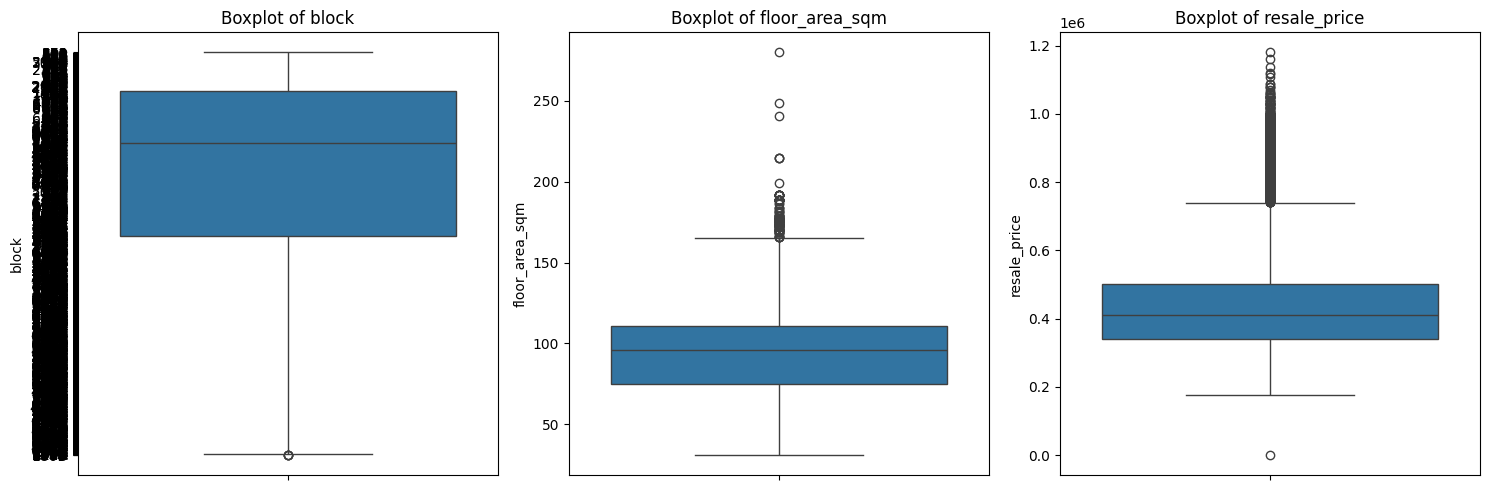

In [63]:

columns_of_interest = ['block', 'floor_area_sqm', 'resale_price']
fig, axes = plt.subplots(nrows=1, ncols=len(columns_of_interest), figsize=(15, 5))

for i, column in enumerate(columns_of_interest):
    sns.boxplot(y=df[column], ax=axes[i])
    axes[i].set_title('Boxplot of {}'.format(column))

plt.tight_layout()
plt.show()


In [64]:
def find_outliers(df, columns):
    outliers = {}
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Clip values within the bounds
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

        outliers[column] = (lower_bound, upper_bound)
    return outliers



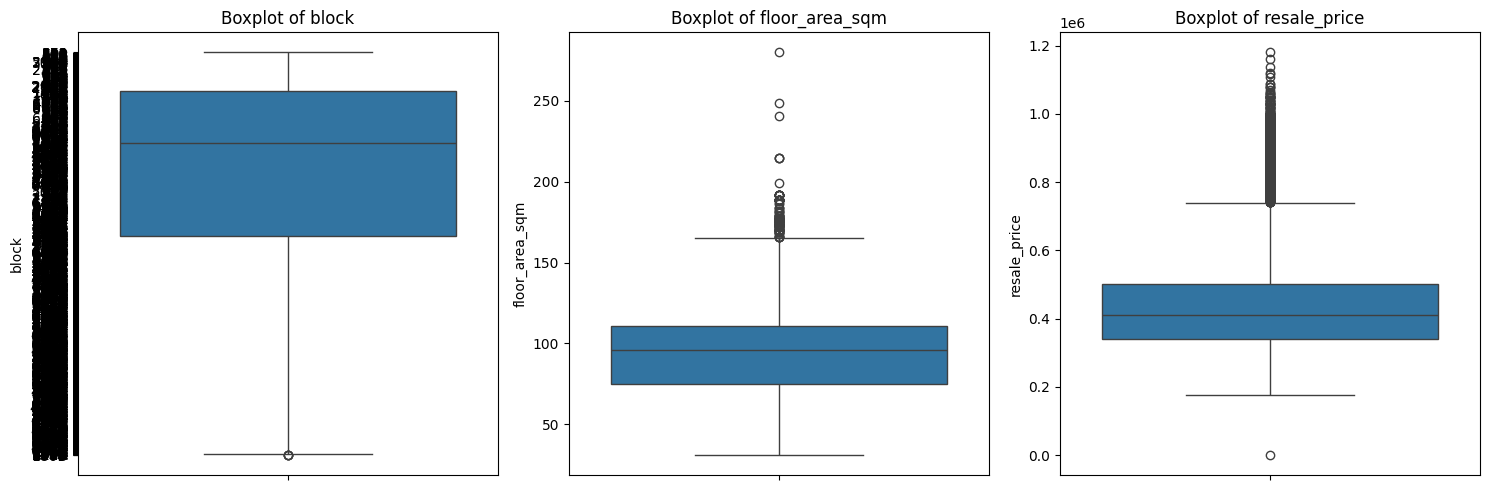

In [65]:
columns_of_interest = ['block', 'floor_area_sqm', 'resale_price']
fig, axes = plt.subplots(nrows=1, ncols=len(columns_of_interest), figsize=(15, 5))

for i, column in enumerate(columns_of_interest):
    sns.boxplot(y=df[column], ax=axes[i])
    axes[i].set_title('Boxplot of {}'.format(column))

plt.tight_layout()
plt.show()

ValueError: Unable to parse string "61 years 04 months" at position 25344

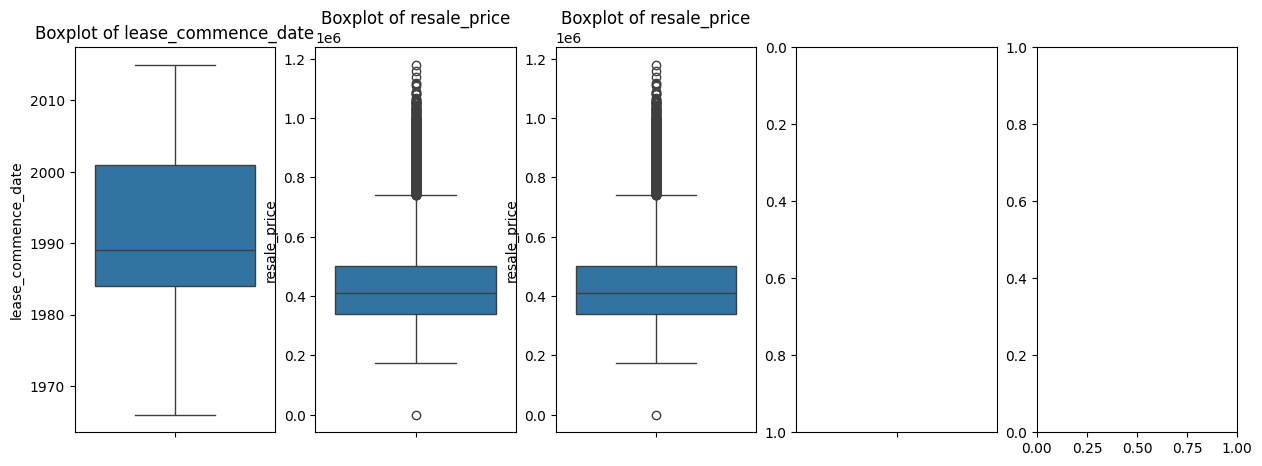

In [68]:
columns_of_interest = ['lease_commence_date',
                        'resale_price',
                        'resale_price',
                        'remaining_lease',
                        'remaining_lease']
fig, axes = plt.subplots(nrows=1, ncols=len(columns_of_interest), figsize=(15, 5))

for i, column in enumerate(columns_of_interest):
    sns.boxplot(y=df[column], ax=axes[i])
    axes[i].set_title('Boxplot of {}'.format(column))

plt.tight_layout()
plt.show()

In [69]:
def find_outliers(df, columns):
    outliers = {}
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Clip values within the bounds
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

        outliers[column] = (lower_bound, upper_bound)
    return outliers

# Example usage:
outliers = find_outliers(df,['lease_commence_date','resale_year','resale_month','storey_lower_bound','storey_upper_bound'] )
print(outliers)


KeyError: 'resale_year'